# K-Nearest Neighbors

In this work, we load a customer dataset, fit the data and use the K-Nearest Neighbors to predict a data point.

**K-Nearest Neighbors** is an algorithm for supervised learning where the data is trained with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it determine it's classification.

## Load Required Libraries

In [2]:
# import required libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

## About the Dataset

The dataset is about a telco provider who wants to segment it's customer base by service usage patterns, categorizing customers into four groups. The telco wants to use demographic data to predict group membership to customize offers for individual prospective customers.

The dataset has a field called **custcat** that has 4 possible values that correspond to the four customer groups as follows: 
- 1 - Basic service 
- 2 - E-service 
- 3 - Plus service 
- 4 - Total service

Our objective is to build a classifier to predict the class of unknown cases using a specific tyoe of classification called K-Nearest Neighbour.

## Loading the dataset

In [5]:
# get the dataset
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/teleCust1000t.csv

--2021-06-29 11:37:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  83.5KB/s    in 0.4s    

2021-06-29 11:37:53 (83.5 KB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



In [10]:
# load data from the csv file
df = pd.read_csv("../data/teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# Data Visualization and Analysis

Let's see how many of each class is in our data set

In [12]:
# value counts for each customer category or class
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

**281 Plus service, 266 Basic service, 236 Total Service and 217 E-service customers**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa04285810>]],
      dtype=object)

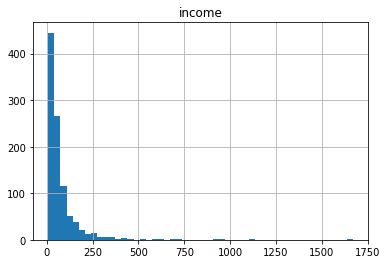

In [13]:
# let's explore the data using visualization techniques
df.hist(column='income', bins=50)

# Feature Sets
Let's define feature sets, X;

In [14]:
# see all columns in the dataset
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

## Convert Pandas dataframe to Numpy array

To use **scikit-learn library**, we have to convert Pandas data frame into Numpy array

In [16]:
# see df values
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.]])

## What are our labels?
Let's see what the labels are for the custcat feature

In [20]:
# see customer category values
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

# Normalize Data
Data Standardization give data zero mean and unit variance, it is good practice especially for algorithms such as KNN which is based on distance of cases:

In [21]:
# use standard scaler for normalization
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

# Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data it has NOT been trained on. Doing a train and test on the same dataset will have low out-of-sample accuracy due to the likelihood of being over-fit.

How can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test/Split. 
Train/Test/Split involves splitting the dataset into training and testing sets respectively which are mutually exclusive. 

This provides a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. 

In [22]:
# use train test split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4) # random state to set the seed for the random generator
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


# Classification

Classifier implementing the k-nearest neighbors

**K-Nearest Neighbor (KNN)**

In [25]:
# import library
from sklearn.neighbors import KNeighborsClassifier

# Training
Let's start the algorithm with k=4 for now:

In [30]:
# set k=4, train the Model and Predict
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

# Predicting
We can use the model to predict the test set

In [33]:
# predicting the test set

yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 1, 2, 4])

# Accuracy Evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the Jaccard_similarity_score function. Essentialy, it calculates how closely the actual labels are from the predicted labels in the matched test set.

In [36]:
# use metrics

from sklearn import metrics
print("Train set accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, yhat))

Train set accuracy: 0.82875
Test set accuracy: 0.735


In [43]:
# Building the model with a larger K

k=6

neigh6 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat6 = neigh6.predict(X_test)
print("Training set accuracy:", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Testing set accuracy:", metrics.accuracy_score(y_test, yhat6))

Training set accuracy: 0.8125
Testing set accuracy: 0.755


# Calculate the accuracy of KNN 
For different Ks

In [45]:
# calculate accuracy

ks = 10
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)
ConfusionMx = []
for n in range(1, ks):
    
    # Train model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.76 , 0.68 , 0.725, 0.735, 0.73 , 0.755, 0.775, 0.77 , 0.765])

# Plot the model accuracy 
For different number of neighbors

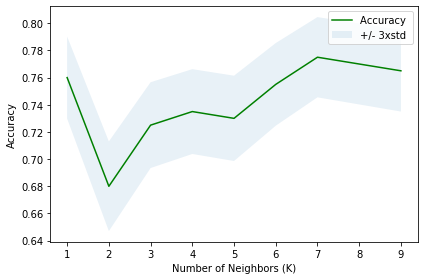

In [47]:
plt.plot(range(1,ks),mean_acc, 'g')
plt.fill_between(range(1,ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [48]:
# printing the best accuracy

print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.775 with k= 7
